In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [5]:
PATH_TO_RESULTS = '/home/lgierz/BA_MothClassification/data/processed/results_pca512_val_both001/'
#PATH_TO_RESULTS = '/home/lgierz/BA_MothClassification/data/processed/results_pca512_val_din0001_res001/'

In [6]:

DATASET_CONFIGS = {
    'top277': (277, [3000, 2000, 1000, 500]),
    'top387': (387, [2000, 1000, 500]),
    'top589': (589, [1000, 500])
}

In [7]:
import os

# Initialize an empty list to store dataframes
dfs = []

# Iterate over the foundational models
for fm in ['dino', 'resnet']:
    # Iterate over the dataset configurations
    for config_name, (species_amount, sample_amounts) in DATASET_CONFIGS.items():
        # Iterate over the sample amounts
        for sample_amount in sample_amounts:
            # Construct the file name
            file_name = f"{fm}_cv_test_top{species_amount}_max{sample_amount}.csv"
            file_path = os.path.join(PATH_TO_RESULTS, file_name)
            
            # Load the CSV file
            df = pd.read_csv(file_path)
            
            # Add the new columns
            df['FoundationalModel'] = 'DINOv2' if fm == 'dino' else 'ResNet50'
            df['SpeciesAmount'] = species_amount
            df['SampleAmount'] = sample_amount
            
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all dataframes into one
result_df = pd.concat(dfs, ignore_index=True)


### Showing best performing hyperparameters over all datasets

### Chosen Values for:
- DINO + Linear Classifier: 0.0005 LR, 1500 Epochs (lowest std and highest mean acc across datasets)
- DINO + KNN: 35 (second highest acc with little left to first place, second lowest std)
- ResNet + Linear Classifier: 0.001 LR, 1500 Epochs (second best acc (nearly identical), better std than first acc)
- ResNet + KNN: 50 (second highest acc with little left to first place, second lowest std)


In [8]:
# Calculate mean and standard deviation of accuracy
mean_accuracy = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])['Accuracy'].mean()
std_accuracy = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])['Accuracy'].std()

# Combine mean and std into a single dataframe
avg_metrics = pd.DataFrame({'Mean Accuracy': mean_accuracy, 'Std Accuracy': std_accuracy}).sort_values(by='Mean Accuracy', ascending=False)
avg_metrics

Mean Accuracy  \
FoundationalModel Model             Learning Rate Epochs                  
DINOv2            Linear Classifier 0.0005        1500.0       0.899967   
                                                  2000.0       0.899478   
                                    0.0010        1500.0       0.898056   
                                                  2000.0       0.896367   
                                    0.0050        1500.0       0.888733   
                                                  2000.0       0.886356   

                                                          Std Accuracy  
FoundationalModel Model             Learning Rate Epochs                
DINOv2            Linear Classifier 0.0005        1500.0      0.019909  
                                                  2000.0      0.020713  
                                    0.0010        1500.0      0.021665  
                                                  2000.0      0.022438  
                                    0.0050        1500.0      0.023646  
                                                  2000.0      0.023948

In [9]:
# Calculate mean and standard deviation of accuracy
mean_accuracy = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])['Accuracy'].mean()
std_accuracy = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'Linear Classifier')].groupby(['FoundationalModel', 'Model', 'Learning Rate', 'Epochs'])['Accuracy'].std()

# Combine mean and std into a single dataframe
avg_metrics = pd.DataFrame({'Mean Accuracy': mean_accuracy, 'Std Accuracy': std_accuracy}).sort_values(by='Mean Accuracy', ascending=False)
avg_metrics

Mean Accuracy  \
FoundationalModel Model             Learning Rate Epochs                  
ResNet50          Linear Classifier 0.0010        2000.0       0.648967   
                                                  1500.0       0.648200   
                                    0.0005        2000.0       0.644333   
                                    0.0050        1500.0       0.639589   
                                    0.0005        1500.0       0.637644   
                                    0.0050        2000.0       0.636067   

                                                          Std Accuracy  
FoundationalModel Model             Learning Rate Epochs                
ResNet50          Linear Classifier 0.0010        2000.0      0.044168  
                                                  1500.0      0.041615  
                                    0.0005        2000.0      0.039055  
                                    0.0050        1500.0      0.053918  
                                    0.0005        1500.0      0.037099  
                                    0.0050        2000.0      0.056475

In [10]:
# Calculate mean and standard deviation of accuracy
mean_accuracy = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])['Accuracy'].mean()
std_accuracy = result_df[(result_df['FoundationalModel'] == 'DINOv2') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])['Accuracy'].std()

# Combine mean and std into a single dataframe
avg_metrics = pd.DataFrame({'Mean Accuracy': mean_accuracy, 'Std Accuracy': std_accuracy}).sort_values(by='Mean Accuracy', ascending=False)
avg_metrics

Mean Accuracy  Std Accuracy
FoundationalModel Model Neighbors                             
DINOv2            KNN   20.0            0.685922      0.044697
                        35.0            0.684289      0.044087
                        50.0            0.680667      0.043940

In [11]:
# Calculate mean and standard deviation of accuracy
mean_accuracy = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])['Accuracy'].mean()
std_accuracy = result_df[(result_df['FoundationalModel'] == 'ResNet50') & (result_df['Model'] == 'KNN')].groupby(['FoundationalModel', 'Model', 'Neighbors'])['Accuracy'].std()

# Combine mean and std into a single dataframe
avg_metrics = pd.DataFrame({'Mean Accuracy': mean_accuracy, 'Std Accuracy': std_accuracy}).sort_values(by='Mean Accuracy', ascending=False)
avg_metrics

Mean Accuracy  Std Accuracy
FoundationalModel Model Neighbors                             
ResNet50          KNN   35.0            0.383078      0.051350
                        50.0            0.381911      0.050322
                        65.0            0.379589      0.049803

### Table of highest Averages across all test results

In [12]:
# result_df.to_csv(os.path.join(PATH_TO_RESULTS, 'all_results.csv'), index=False)
# print(result_df.shape)
# result_df[['SpeciesAmount', 'SampleAmount', 'FoundationalModel', 'Model', 'Accuracy', 'Neighbors', 'Learning Rate', 'Epochs']].sort_values(by='Accuracy', ascending=False).head(20).reset_index(drop=True)

In [13]:
# Filter the dataframe for KNN and Linear Classifier
knn_df = result_df[result_df['Model'] == 'KNN'].reset_index()
linear_df = result_df[result_df['Model'] == 'Linear Classifier'].reset_index()


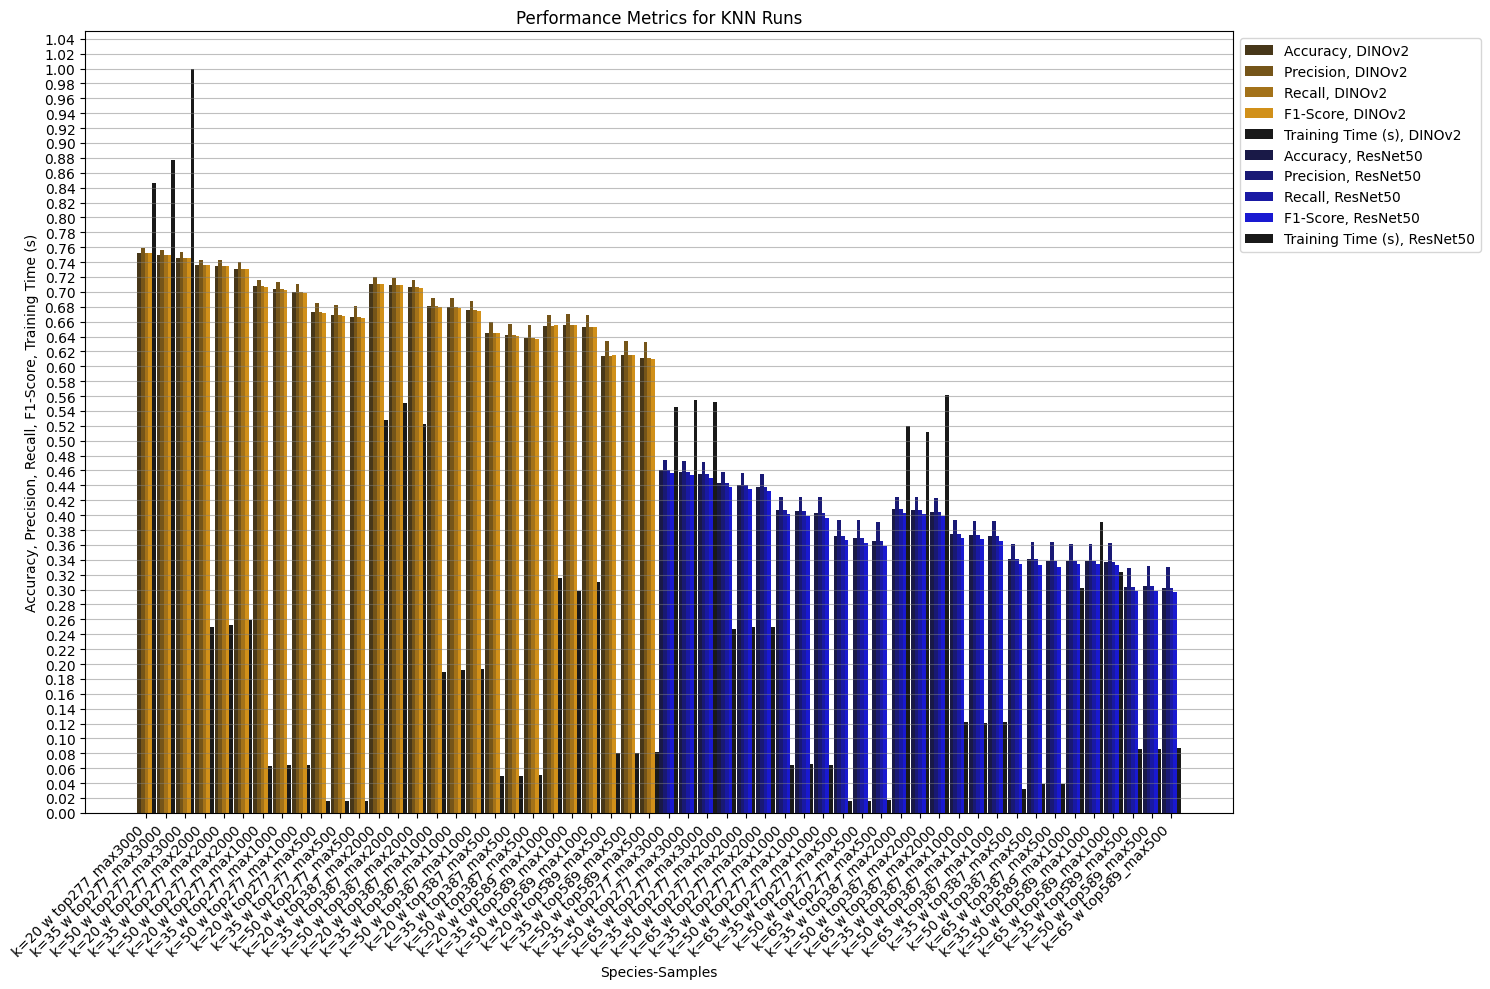

In [14]:
import matplotlib.colors as mcolors

def adjust_color_brightness(color, factor): 
    c = mcolors.to_rgb(color) 
    return (c[0] * factor, c[1] * factor, c[2] * factor)

# Colors for foundational models
colors = {
    'DINOv2': 'orange',
    'ResNet50': 'blue'
}

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.19
index = np.arange(len(knn_df))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
bar_positions = {
    'Accuracy': 0,
    'Precision': 1,
    'Recall': 2,
    'F1-Score': 3,
    'Training Time (s)': 4
}

highest_training_duration = max(knn_df['Training Time (s)'])

added_labels = set()

# Draw bars
for i, row in knn_df.iterrows():
    basecolor = colors[row['FoundationalModel']]
    
    for metric in metrics:
        label_text = f'{metric}, {row["FoundationalModel"]}'
        
        # Add label only if it hasn't been added before
        label = label_text if label_text not in added_labels else None
        if label:
            added_labels.add(label_text)

        ax.bar(
            i + bar_positions[metric] * bar_width, 
            row[metric] / highest_training_duration if metric == 'Training Time (s)' else row[metric],
            width=bar_width,
            label=label,
            color=adjust_color_brightness(basecolor, ((bar_positions[metric]+1) % 5)*0.2), # setting color for Time to black (modulo 5 = 0)
            alpha=0.9
        )        

# X-axis labels
# xtick_labels = [f'Neighbors: {int(neighbors)}, Species: {int(species)}, Samples: {int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]
xtick_labels = [f'k={int(neighbors)} w top{int(species)}_max{int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]

ax.set_xlabel('Species-Samples')
ax.set_ylabel('Accuracy, Precision, Recall, F1-Score, Training Time (s)')
ax.set_title('Performance Metrics for KNN Runs')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.grid(axis='y', which='major', linestyle='-', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


23.4


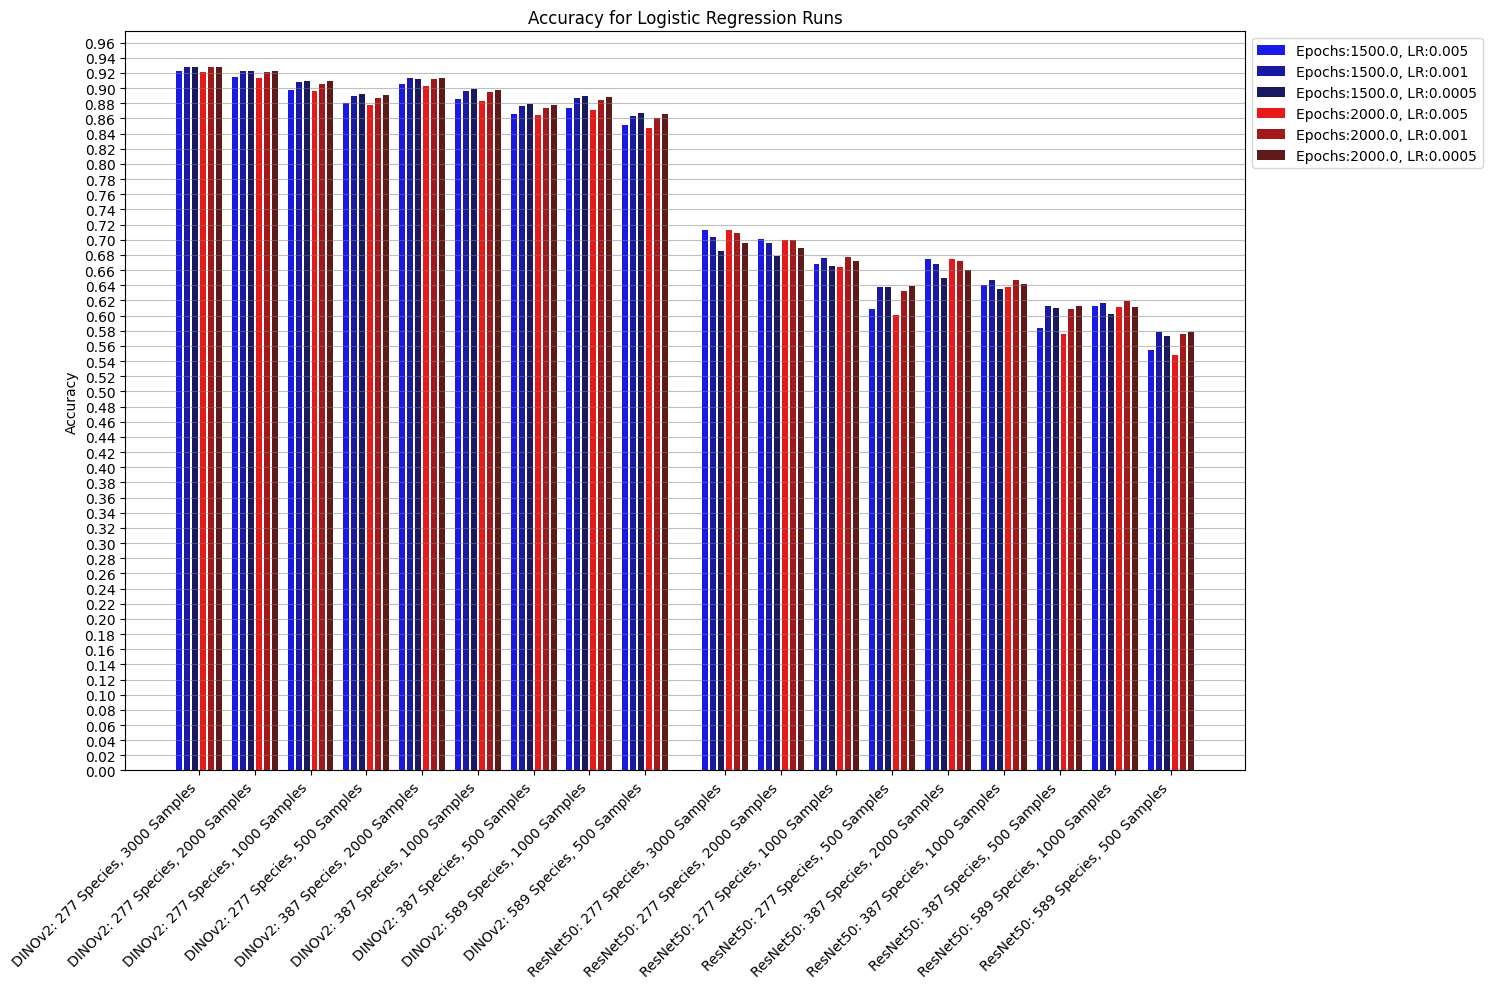

In [15]:

# Colors for foundational models
epoch_colors = {
    1500: 'blue',
    2000: 'red',
}

lr_shades = {
    0.005: 0.9,
    0.001: 0.6,
    0.0005: 0.3,
    # 0.0001: 0.6,
    # 0.0: 0.9,

}

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.3
index = np.arange(len(linear_df))

highest_training_duration = max(linear_df['Training Time (s)'])

added_labels = set()
baseoffset = 0
metric = 'Accuracy'

xtick_labels = []

# Draw bars
for i, row in linear_df.iterrows():

    

    label_text = f'Epochs:{row["Epochs"]}, LR:{row["Learning Rate"]}'
    
    # Add label only if it hasn't been added before
    label = label_text if label_text not in added_labels else None
    if label:
        added_labels.add(label_text)

    pos = i * 0.4

    ax.bar(
        baseoffset + pos, 
        row[metric],
        width=bar_width,
        label=label,
        color=adjust_color_brightness(epoch_colors[row['Epochs']], lr_shades[row['Learning Rate']]),
        alpha=0.9
    )
    i += 1        
    if i != 0 and i % 6 == 0:
        xtick_labels.append(f"{row['FoundationalModel']}: {row['SpeciesAmount']} Species, {row['SampleAmount']} Samples")
        baseoffset += 0.4
    if i != 0 and i % 54 == 0:
        baseoffset += 1.2
        

# X-axis labels
# xtick_labels = [f'Neighbors: {int(neighbors)}, Species: {int(species)}, Samples: {int(samples)}' for neighbors, species, samples in zip(knn_df['Neighbors'], knn_df['SpeciesAmount'], knn_df['SampleAmount'])]
# xtick_labels = ['DINOv2', 'ResNet50']

#ax.set_xlabel('Species-Samples')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Logistic Regression Runs')
dino_ticks = [1 + 2.8 * x for x in range(9)]
print(dino_ticks[-1])
resnet_ticks = [27.4 + 2.8 * x for x in range(9)]
ax.set_xticks(dino_ticks + resnet_ticks)
#ax.set_xticks(range(2, 2 * (len(xtick_labels) + 1), 2))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', bbox_to_anchor=(1, 1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.grid(axis='y', which='major', linestyle='-', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


[1500. 2000.] [0.005  0.001  0.0005] [277 387 589]
Combinations:  6


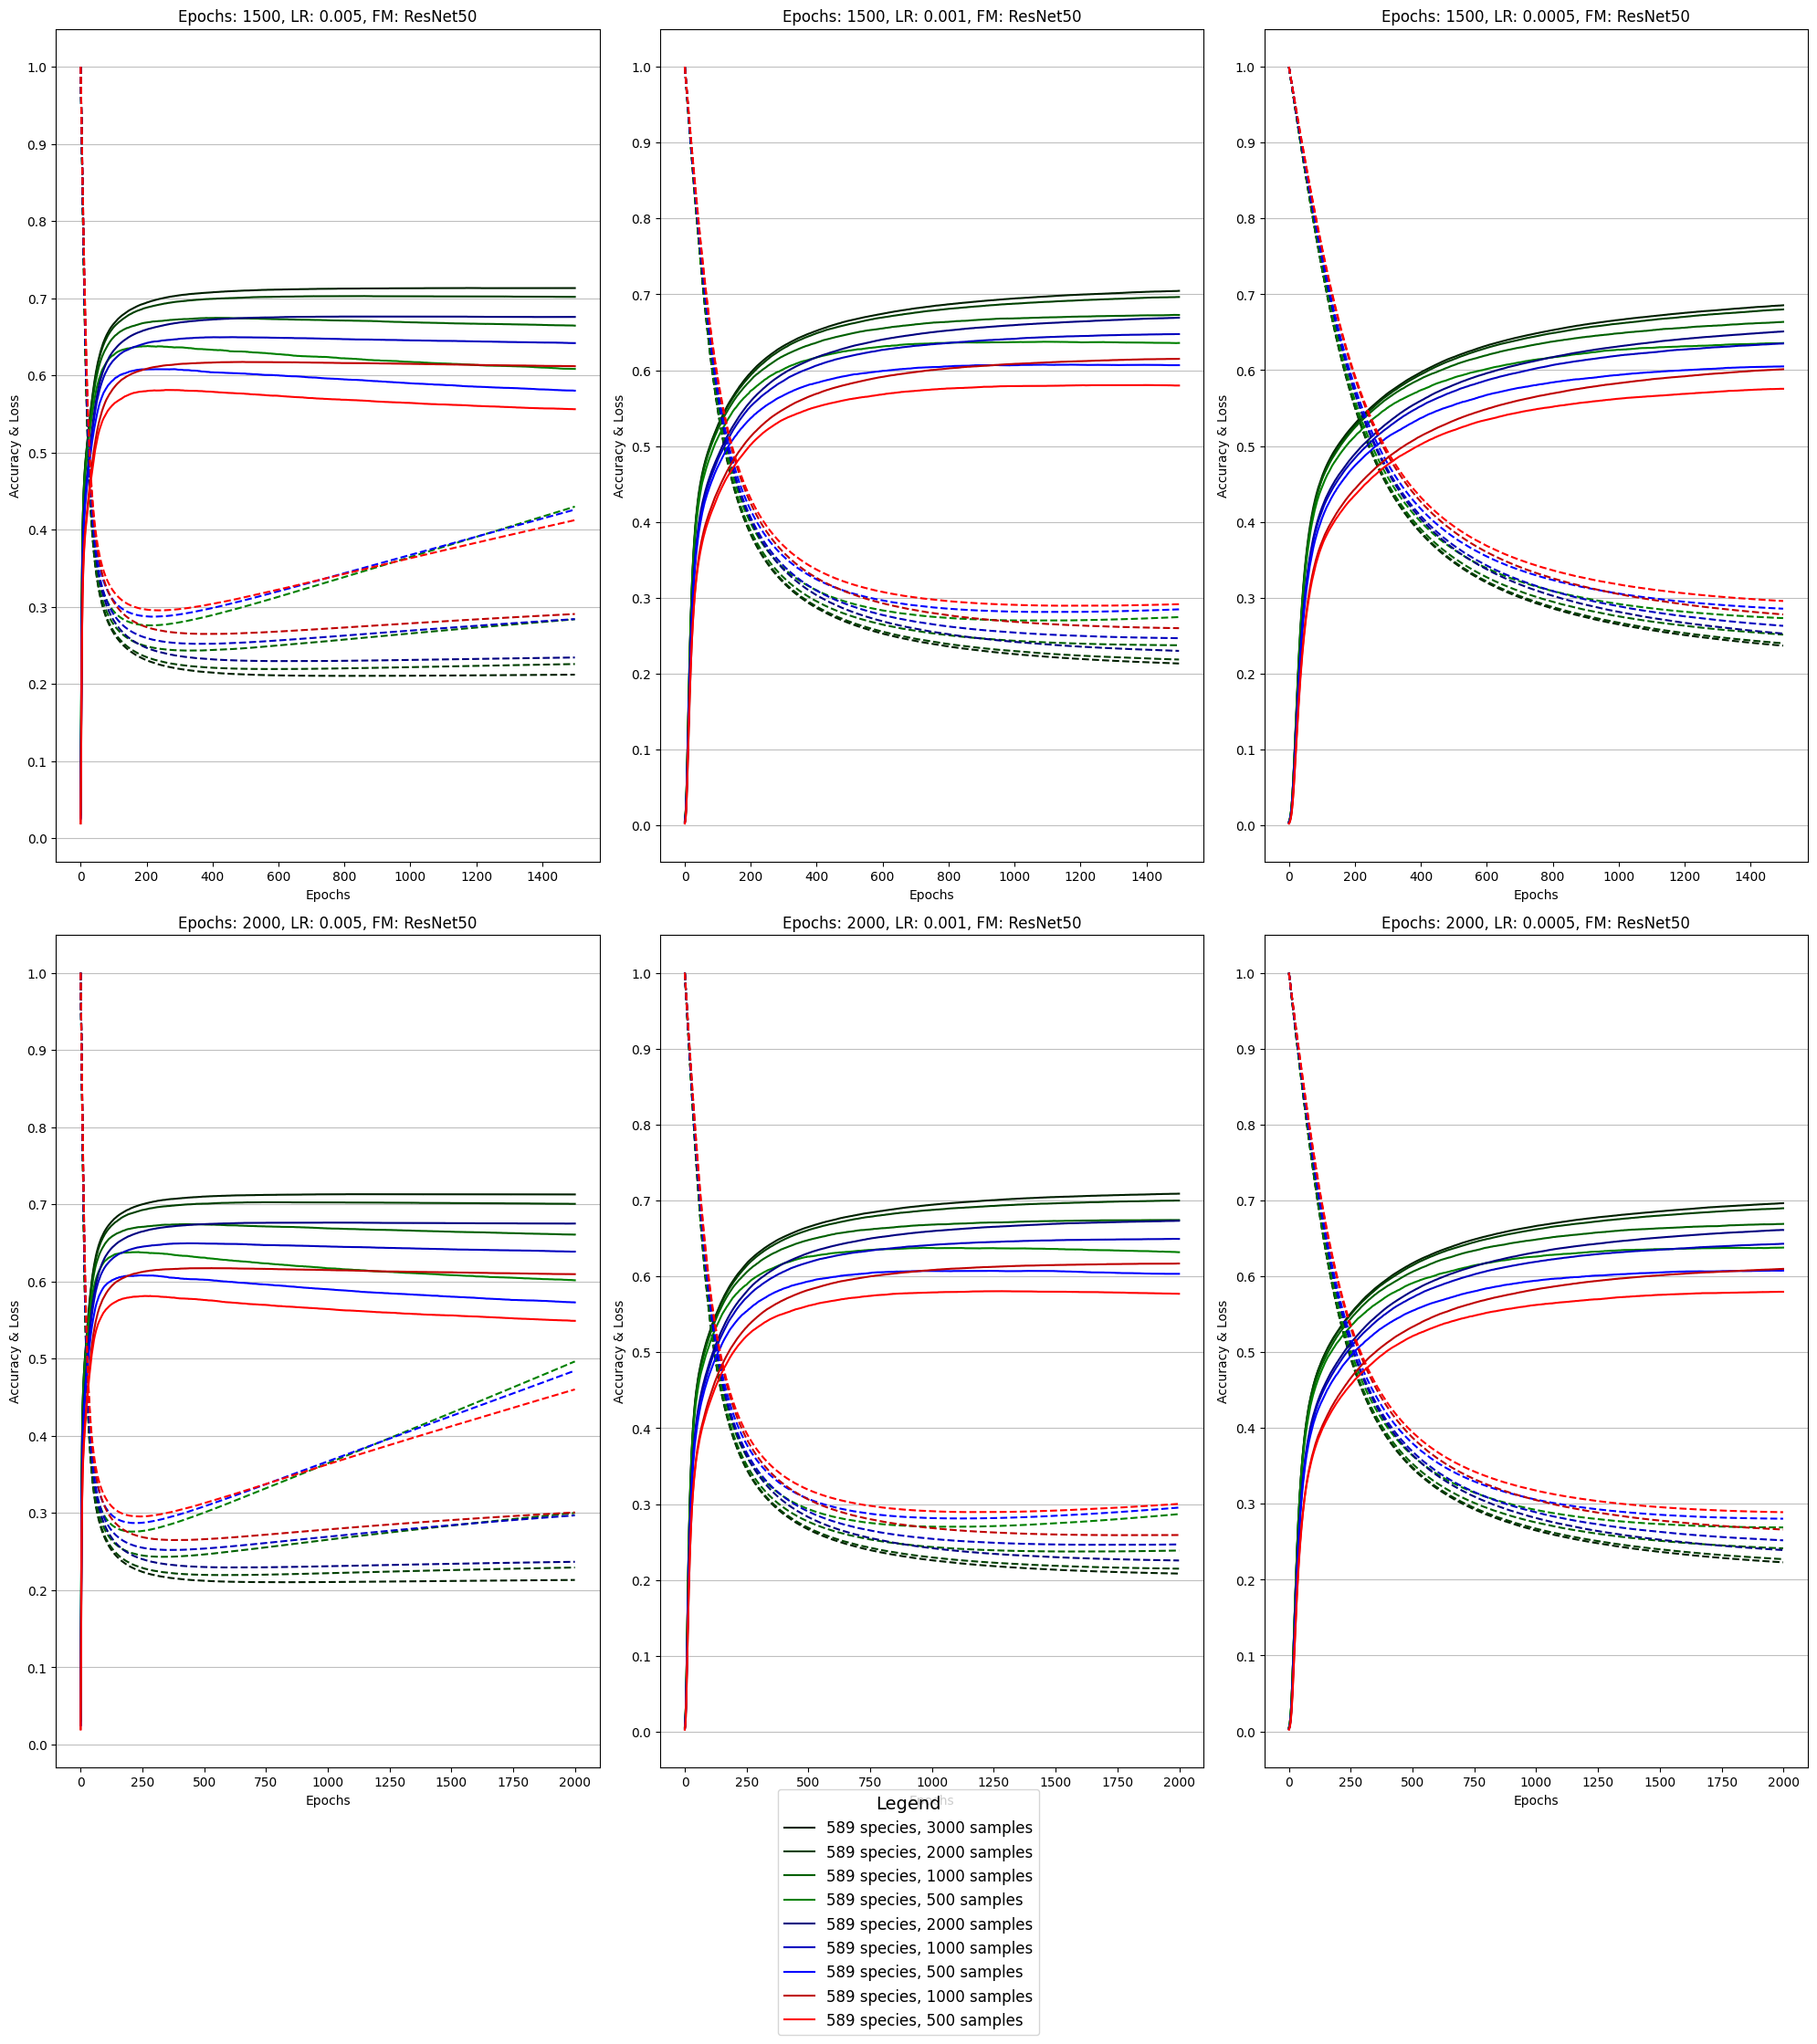

In [16]:
# Find unique epochs and learning rates

foundational_models = ['ResNet50']

resnet_linear_df = linear_df[linear_df['FoundationalModel'].isin(foundational_models)]

unique_epochs = resnet_linear_df['Epochs'].unique()
unique_learning_rates = resnet_linear_df['Learning Rate'].unique()
unique_species_amounts = resnet_linear_df['SpeciesAmount'].unique()

print(unique_epochs, unique_learning_rates, unique_species_amounts)


fig, axs = plt.subplots(2, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.33, wspace=0.33)

# Colors for the lines
species_colors = {
    277: 'green',
    387: 'blue',
    589: 'red'
}

samplesize_shades = {
    500: 1.0,
    1000: 0.75,
    2000: 0.5,
    3000: 0.25
}


def generate_combinations(*args):
    return list(product(*args))

combinations = generate_combinations(unique_epochs, unique_learning_rates, foundational_models)

print('Combinations: ', len(combinations))
# Draw the line plots
for idx, (epoch, lr, fm) in enumerate(combinations):
    ax = axs[idx // 3, idx % 3]
    runs = linear_df[(linear_df['Epochs'] == epoch) & (linear_df['Learning Rate'] == lr) & (linear_df['FoundationalModel'] == fm)].reset_index()
    for i, run in runs.iterrows():            
        epoch_losses = eval(run['Validation Losses'])  # Eval for list of losses
        epoch_losses_max = max(epoch_losses)
        epoch_losses = [loss / epoch_losses_max for loss in epoch_losses]
        epoch_accuracies = eval(run['Validation Accuracies'])  # Eval for list of accuracies
        
        color = species_colors[run['SpeciesAmount']]
        shade = samplesize_shades[run['SampleAmount']]
        adjusted_color = adjust_color_brightness(color, shade)
        
        ax.plot(epoch_losses, linestyle='--', color=adjusted_color)
        ax.plot(epoch_accuracies, label=f'{species_amount} species, {run["SampleAmount"]} samples', linestyle='-', color=adjusted_color)
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
        #ax.yaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.grid(axis='y', which='both', linestyle='-', color='gray', alpha=0.5)
        ax.set_title(f'Epochs: {int(epoch)}, LR: {lr}, FM: {fm}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy & Loss')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), title="Legend", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

[1500. 2000.] [0.005  0.001  0.0005] [277 387 589]
Combinations:  6


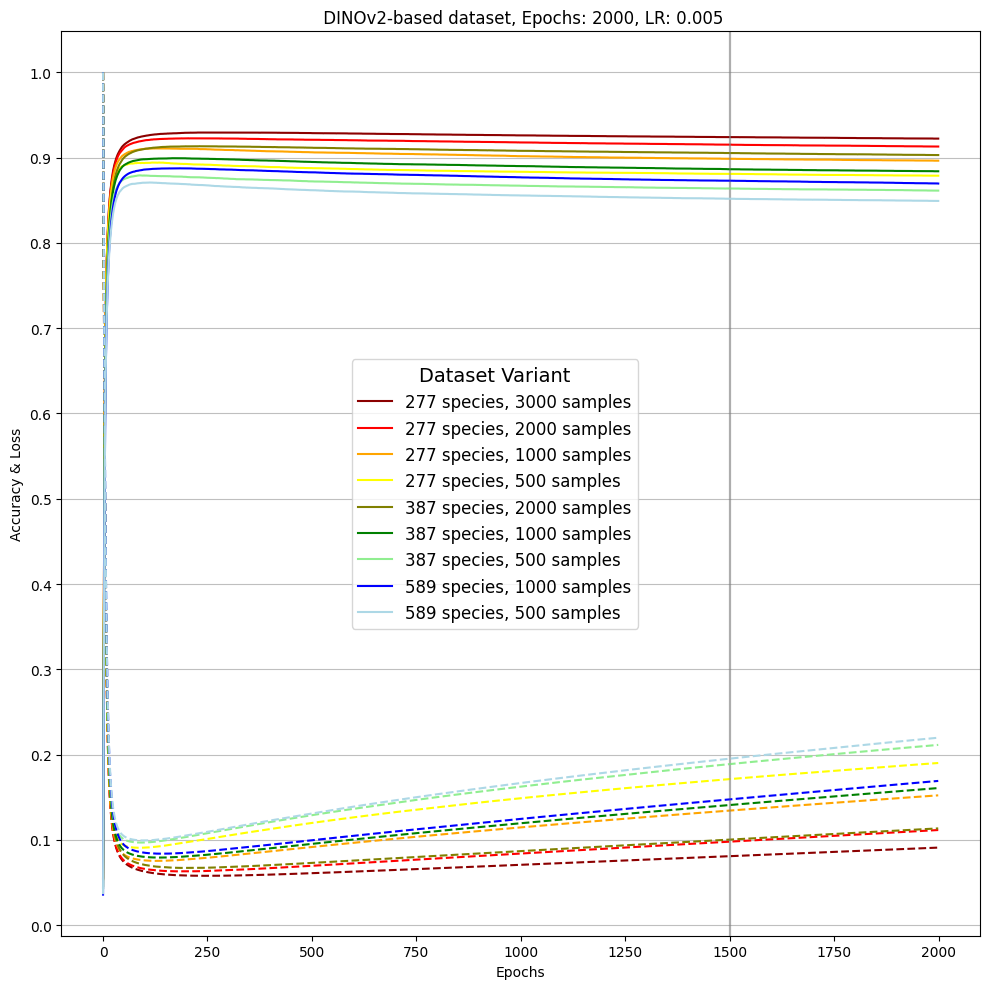

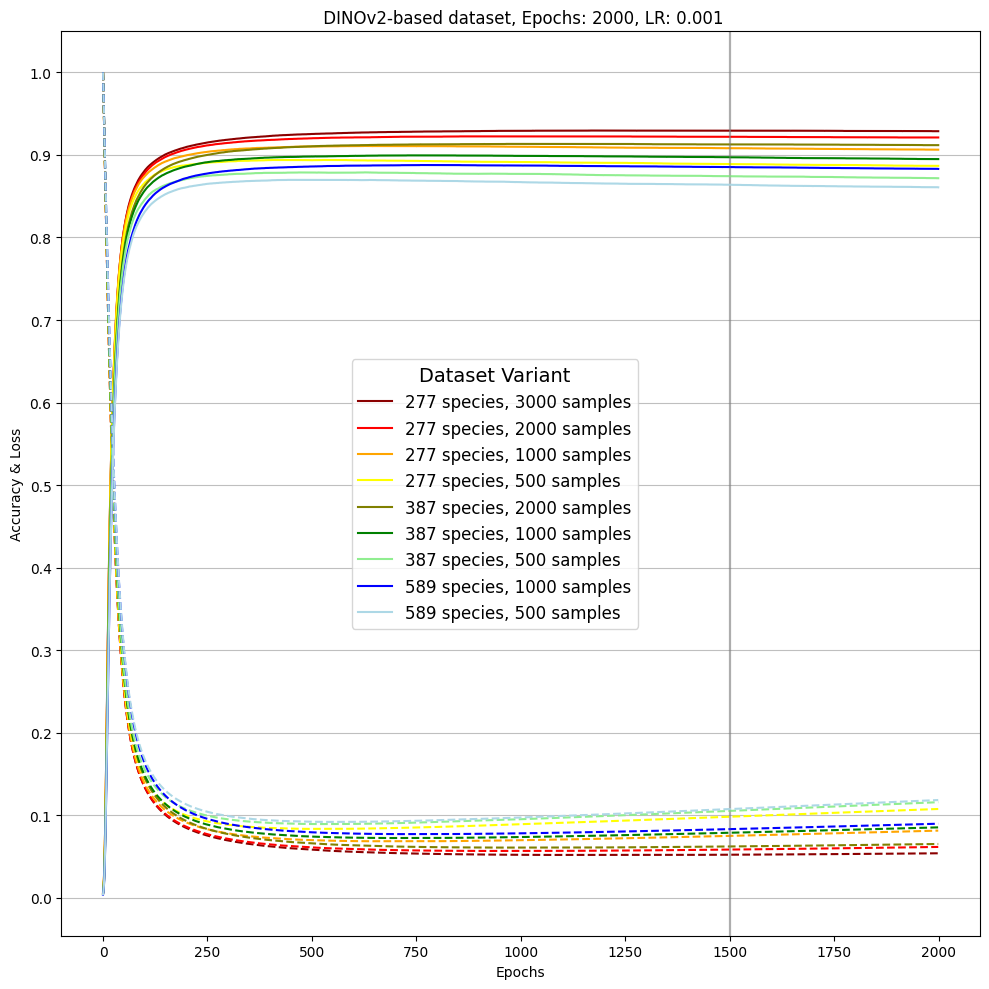

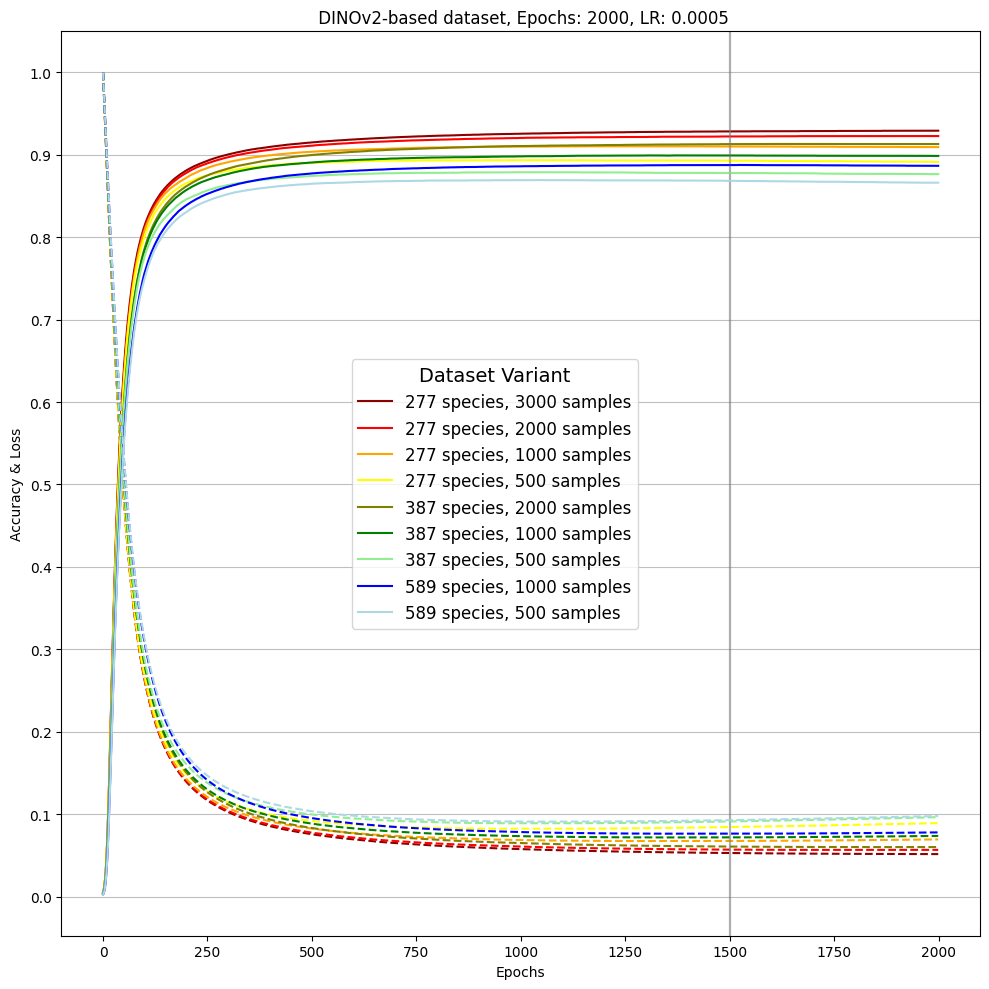

In [17]:
# Find unique epochs and learning rates

foundational_models = ['DINOv2']

dino_linear_df = linear_df[linear_df['FoundationalModel'].isin(foundational_models)]

unique_epochs = dino_linear_df['Epochs'].unique()
unique_learning_rates = dino_linear_df['Learning Rate'].unique()
unique_species_amounts = dino_linear_df['SpeciesAmount'].unique()
print(unique_epochs, unique_learning_rates, unique_species_amounts)

# Colors for the lines
species_colors = {
    277: 'yellow',
    387: 'blue',
    589: 'red'
}

samplesize_shades = {
    500: 1.0,
    1000: 0.85,
    2000: 0.60,
    3000: 0.45
}

rainbow_colors = {
    (277, 3000): 'darkred',
    (277, 2000): 'red',
    (277, 1000): 'orange',
    (277, 500): 'yellow',
    (387, 2000): 'olive',
    (387, 1000): 'green',
    (387, 500): 'lightgreen',
    (589, 1000): 'blue',
    (589, 500): 'lightblue'
}


def generate_combinations(*args):
    return list(product(*args))

combinations = generate_combinations(unique_epochs, unique_learning_rates, foundational_models)

print('Combinations: ', len(combinations))

# Create separate figures for each learning rate
for lr in unique_learning_rates:
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.33, wspace=0.33)
    
    # Draw the line plots
    for epoch, fm in product(unique_epochs, foundational_models):
        if epoch == 1500:
            continue
        ax = axs
        runs = linear_df[(linear_df['Epochs'] == epoch) & (linear_df['Learning Rate'] == lr) & (linear_df['FoundationalModel'] == fm)].reset_index()
        for i, run in runs.iterrows():            
            epoch_losses = eval(run['Validation Losses'])  # Eval for list of losses
            epoch_losses_max = max(epoch_losses)
            epoch_losses = [loss / epoch_losses_max for loss in epoch_losses]
            epoch_accuracies = eval(run['Validation Accuracies'])  # Eval for list of accuracies
            
            # color = species_colors[run['SpeciesAmount']]
            # shade = samplesize_shades[run['SampleAmount']]
            # adjusted_color = adjust_color_brightness(color, shade)
            adjusted_color = rainbow_colors[(run['SpeciesAmount'], run['SampleAmount'])]
            
            ax.plot(epoch_losses, linestyle='--', color=adjusted_color, linewidth=1.5)
            ax.plot(epoch_accuracies, label=f'{run["SpeciesAmount"]} species, {run["SampleAmount"]} samples', linestyle='-',linewidth=1.5, color=adjusted_color)
            ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
            ax.grid(axis='y', which='both', linestyle='-', color='gray', alpha=0.5)
            ax.set_title(f' {fm}-based dataset, Epochs: {int(epoch)}, LR: {lr}')
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy & Loss')
            ax.axvline(x=1500, color='gray', linestyle='-', alpha=0.1)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.5), title='Dataset Variant', fontsize=12, title_fontsize=14)

    plt.tight_layout()
    plt.show()

[1500. 2000.] [0.005  0.001  0.0005] [277 387 589]
Combinations:  6


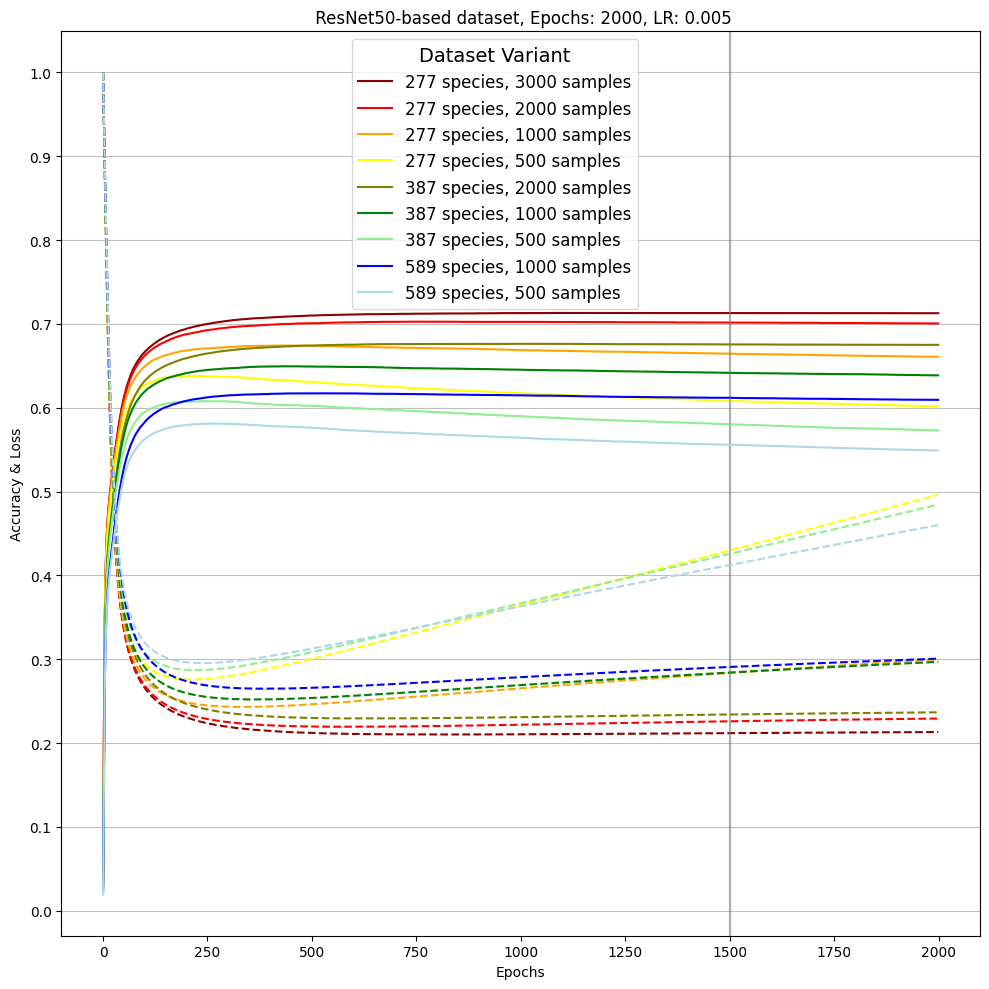

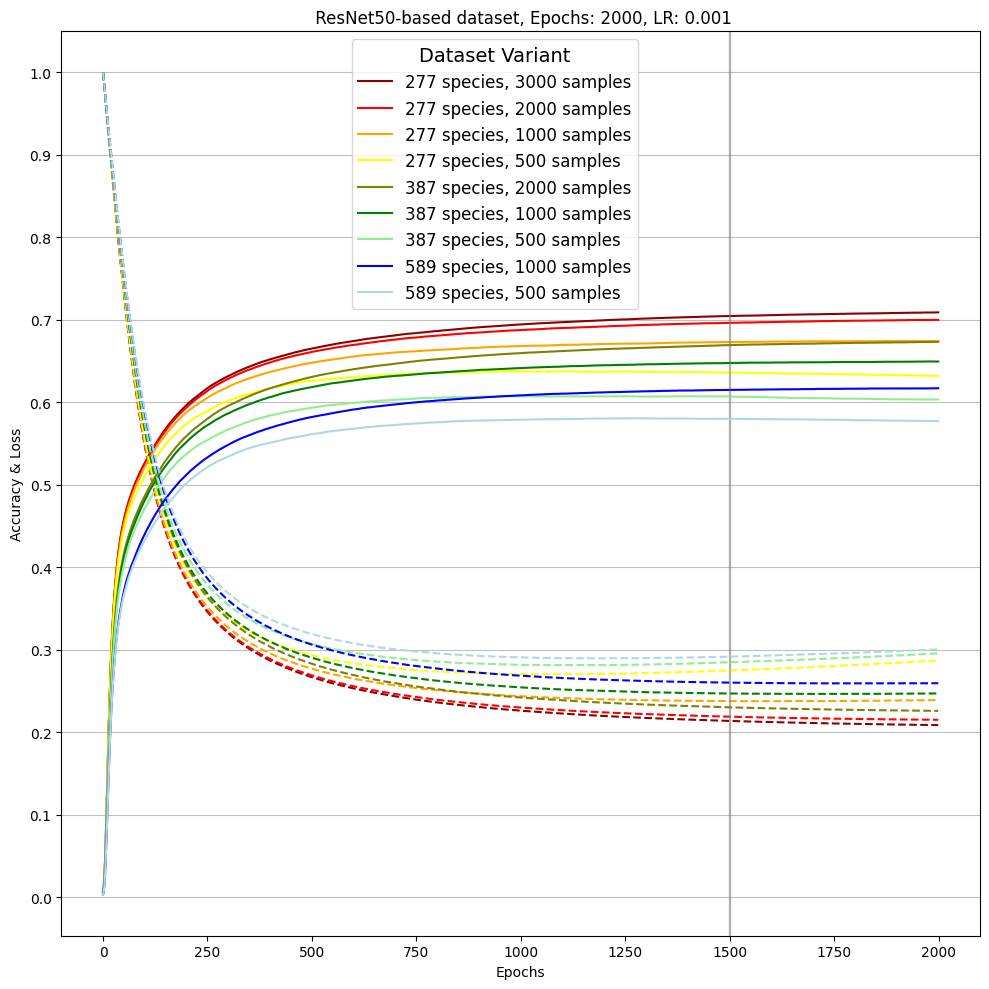

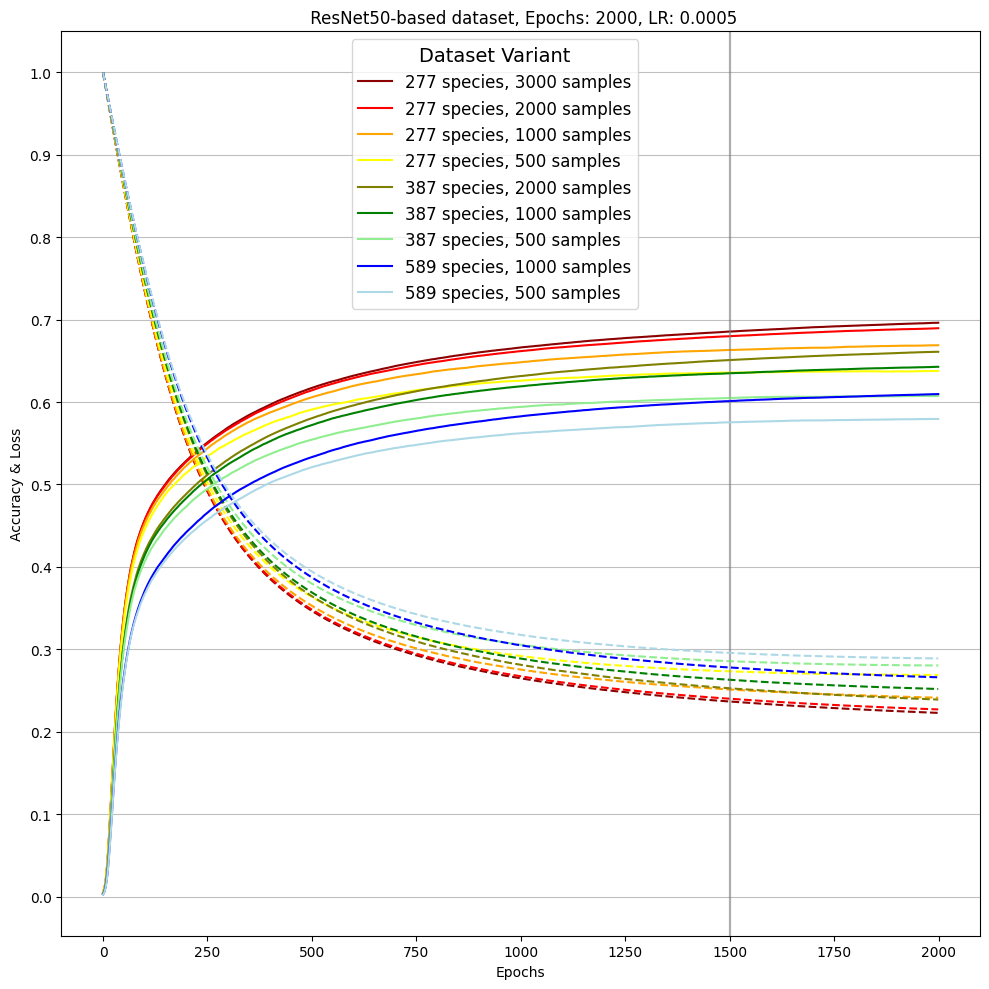

In [18]:
# Find unique epochs and learning rates

foundational_models = ['ResNet50']

dino_linear_df = linear_df[linear_df['FoundationalModel'].isin(foundational_models)]

unique_epochs = dino_linear_df['Epochs'].unique()
unique_learning_rates = dino_linear_df['Learning Rate'].unique()
unique_species_amounts = dino_linear_df['SpeciesAmount'].unique()
print(unique_epochs, unique_learning_rates, unique_species_amounts)

# Colors for the lines
species_colors = {
    277: 'yellow',
    387: 'blue',
    589: 'red'
}

samplesize_shades = {
    500: 1.0,
    1000: 0.85,
    2000: 0.60,
    3000: 0.45
}

rainbow_colors = {
    (277, 3000): 'darkred',
    (277, 2000): 'red',
    (277, 1000): 'orange',
    (277, 500): 'yellow',
    (387, 2000): 'olive',
    (387, 1000): 'green',
    (387, 500): 'lightgreen',
    (589, 1000): 'blue',
    (589, 500): 'lightblue'
}


def generate_combinations(*args):
    return list(product(*args))

combinations = generate_combinations(unique_epochs, unique_learning_rates, foundational_models)

print('Combinations: ', len(combinations))

# Create separate figures for each learning rate
for lr in unique_learning_rates:
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.33, wspace=0.33)
    
    # Draw the line plots
    for epoch, fm in product(unique_epochs, foundational_models):
        if epoch == 1500:
            continue
        ax = axs
        runs = linear_df[(linear_df['Epochs'] == epoch) & (linear_df['Learning Rate'] == lr) & (linear_df['FoundationalModel'] == fm)].reset_index()
        for i, run in runs.iterrows():            
            epoch_losses = eval(run['Validation Losses'])  # Eval for list of losses
            epoch_losses_max = max(epoch_losses)
            epoch_losses = [loss / epoch_losses_max for loss in epoch_losses]
            epoch_accuracies = eval(run['Validation Accuracies'])  # Eval for list of accuracies
            
            # color = species_colors[run['SpeciesAmount']]
            # shade = samplesize_shades[run['SampleAmount']]
            # adjusted_color = adjust_color_brightness(color, shade)
            adjusted_color = rainbow_colors[(run['SpeciesAmount'], run['SampleAmount'])]
            
            ax.plot(epoch_losses, linestyle='--', color=adjusted_color, linewidth=1.5)
            ax.plot(epoch_accuracies, label=f'{run["SpeciesAmount"]} species, {run["SampleAmount"]} samples', linestyle='-',linewidth=1.5, color=adjusted_color)
            ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
            ax.grid(axis='y', which='both', linestyle='-', color='gray', alpha=0.5)
            ax.set_title(f' {fm}-based dataset, Epochs: {int(epoch)}, LR: {lr}')
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy & Loss')
            ax.axvline(x=1500, color='gray', linestyle='-', alpha=0.1)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.82), title='Dataset Variant', fontsize=12, title_fontsize=14)

    plt.tight_layout()
    plt.show()

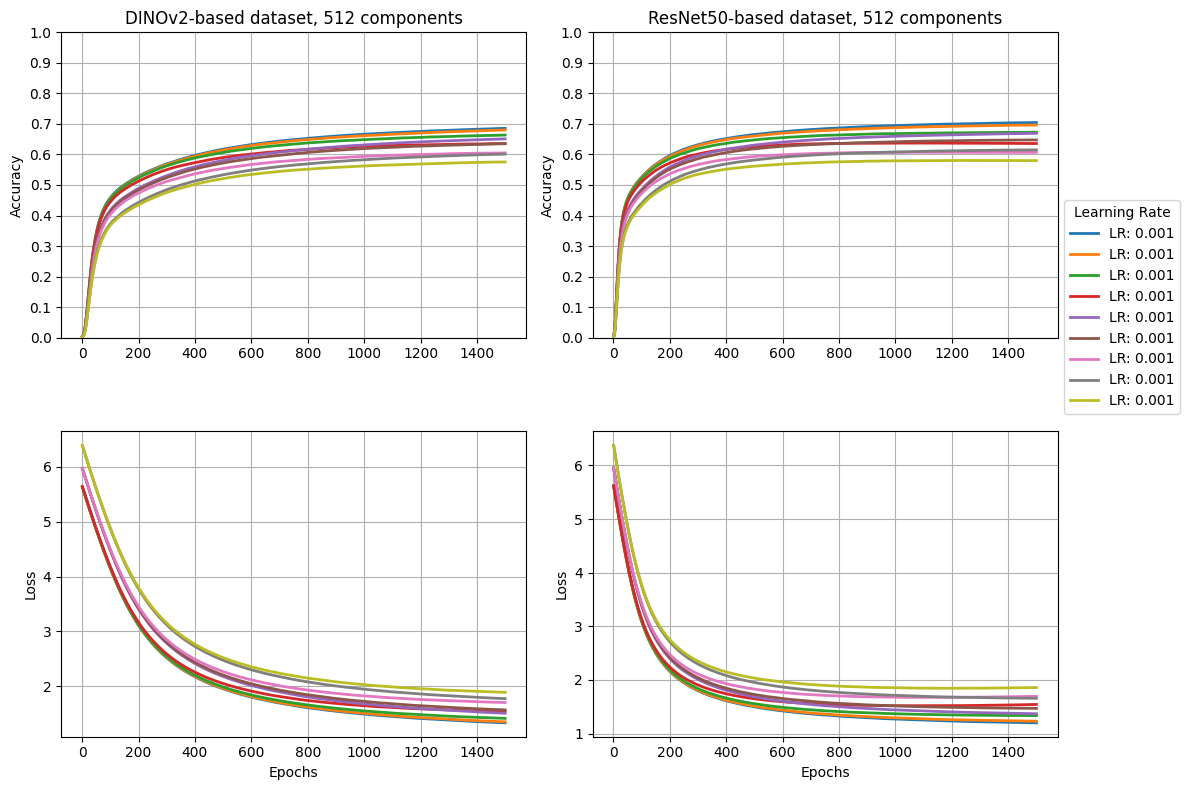

In [19]:
# Filter the dataframes for the specified variants
resnet_df_filtered = resnet_linear_df[(resnet_linear_df['Epochs'] == 1500) & (resnet_linear_df['Learning Rate'] == 0.001)]
dino_df_filtered = dino_linear_df[(dino_linear_df['Epochs'] == 1500) & (dino_linear_df['Learning Rate'] == 0.0005)]

# Create the plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy for DINO
for i, row in dino_df_filtered.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax1.plot(epochs, epoch_accuracies, label=f'LR: {row["Learning Rate"]}', linewidth=2)

# Plot loss for DINO
for i, row in dino_df_filtered.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax2.plot(epochs, epoch_losses, label=f'LR: {row["Learning Rate"]}', linewidth=2)

# Plot accuracy for ResNet50
for i, row in resnet_df_filtered.iterrows():
    epoch_accuracies = eval(row['Validation Accuracies'])
    epochs = range(1, len(epoch_accuracies) + 1)
    ax3.plot(epochs, epoch_accuracies, label=f'LR: {row["Learning Rate"]}', linewidth=2)

# Plot loss for ResNet50
for i, row in resnet_df_filtered.iterrows():
    epoch_losses = eval(row['Validation Losses'])
    epochs = range(1, len(epoch_losses) + 1)
    ax4.plot(epochs, epoch_losses, label=f'LR: {row["Learning Rate"]}', linewidth=2)

# Labels and title for DINO
ax1.set_title('DINOv2-based dataset, 512 components')
ax1.set_ylabel('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

# Labels and title for ResNet50
ax3.set_title('ResNet50-based dataset, 512 components')
ax3.set_ylabel('Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')

# Set y-axis limits and grid for accuracy plots
ax1.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax1.grid(True)
ax3.grid(True)
ax1.set_yticks(np.arange(0, 1.05, 0.1))
ax3.set_yticks(np.arange(0, 1.05, 0.1))

# Set grid for loss plots
ax2.grid(True)
ax4.grid(True)

# Add legend
ax3.legend(title='Learning Rate', loc='center left', bbox_to_anchor=(1.0, 0.1))

plt.tight_layout()
plt.show()


In [20]:
# Define colors for the models
colors = {
    'DINOv2 - KNN': 'blue',
    'ResNet50 - KNN': 'darkgreen',
    'DINOv2 - Linear Classifier': 'blue',
    'ResNet50 - Linear Classifier': 'darkgreen'
}

# Define the specific parameters
specific_params = {
    'DINOv2': {'KNN': 35, 'Linear Classifier': {'Learning Rate': 0.0005, 'Epochs': 1500}},
    'ResNet50': {'KNN': 50, 'Linear Classifier': {'Learning Rate': 0.001, 'Epochs': 1500}}
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the lines for each combination of dataset variants and foundational models
for fm in ['DINOv2', 'ResNet50']:
    for model in ['KNN', 'Linear Classifier']:

        fakelabel = f'{fm} - {model}'
        color = colors[fakelabel]
        
        if model == 'KNN':
            subset = result_df[(result_df['Model'] == model) & 
                               (result_df['FoundationalModel'] == fm) & 
                               (result_df['Neighbors'] == specific_params[fm][model])]
        else:
            subset = result_df[(result_df['Model'] == model) & 
                               (result_df['FoundationalModel'] == fm) & 
                               (result_df['Learning Rate'] == specific_params[fm][model]['Learning Rate']) & 
                               (result_df['Epochs'] == specific_params[fm][model]['Epochs'])]
        
        # Sort the subset by SpeciesAmount and SampleAmount
        subset = subset.sort_values(['SpeciesAmount', 'SampleAmount'])
        
        # Adjust x-values for scatter points
        x_values = np.arange(len(subset))
        # if model == 'KNN':
        #     x_values = x_values - 0.1
        # else:
        #     x_values = x_values + 0.1
        
        # Plot the accuracy
        ax.scatter(x_values, subset['Accuracy'],
                   label=f'{fm}-based dataset - {'KNN' if model == 'KNN' else 'Logistic Regression'}',
                   color=color,
                   marker='x' if model == 'KNN' else 'D',
                   s=50)

# X-axis labels
xtick_labels = [f'{species} Species,\n{samples} Samples' for species, samples in zip(subset['SpeciesAmount'], subset['SampleAmount'])]

ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Labels and title
ax.set_xlabel('Dataset Variants')
ax.set_ylabel('Accuracy')
#ax.set_title('Accuracy for KNN and Linear Classifier with Specific Parameters')

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), loc='center left', bbox_to_anchor=(0, 0.15))

plt.yticks(np.arange(0, 1.05, 0.1))
plt.tight_layout()
plt.grid()
plt.show()


SyntaxError: invalid syntax (1030514123.py, line 47)

### Parameter Choice: 1500 Epochs, 0.0005 LR

In [ ]:
# Calculate mean training times grouped by Model, SpeciesAmount, and SampleAmount
mean_times = result_df.groupby(['Model', 'SpeciesAmount', 'SampleAmount'])['Training Time (s)'].mean().reset_index()
mean_times = mean_times.sort_values(by=['SampleAmount', 'SpeciesAmount', 'Model'])

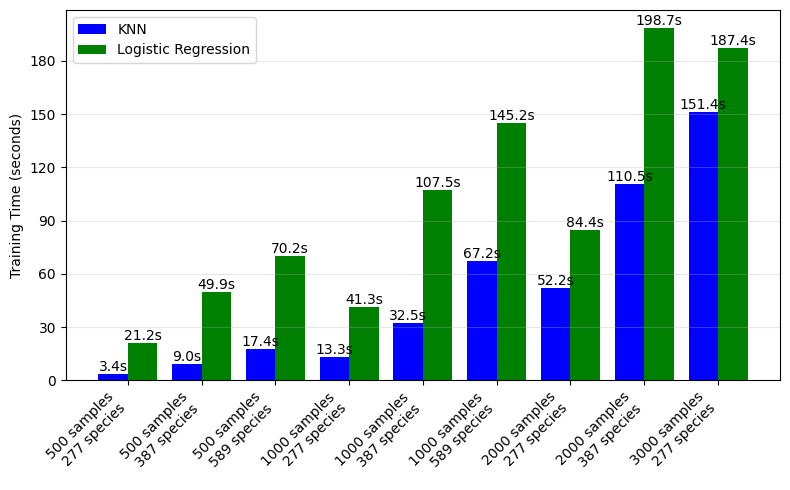

In [ ]:

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define colors for the models
colors = {
    'KNN': 'blue',
    'Linear Classifier': 'green'
}

# Calculate the bar width and positions
bar_width = 0.4
positions = np.arange(len(mean_times) // 2)

# Plot bars for KNN
knn_data = mean_times[mean_times['Model'] == 'KNN']
bars_knn = ax.bar(positions, knn_data['Training Time (s)'], bar_width, label='KNN', color=colors['KNN'])

# Plot bars for Linear Classifier
linear_data = mean_times[mean_times['Model'] == 'Linear Classifier']
bars_linear = ax.bar(positions + bar_width, linear_data['Training Time (s)'], bar_width, label='Logistic Regression', color=colors['Linear Classifier'])

# Customize the plot
ax.set_ylabel('Training Time (seconds)')
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels([f"{row['SampleAmount']} samples\n{row['SpeciesAmount']} species" 
                    for _, row in knn_data.iterrows()], 
                   rotation=45, ha='right')

#ax.set_title('Average Training Time per Dataset Configuration')
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on top of each bar
for bars in [bars_knn, bars_linear]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                f'{height:.1f}s',
                ha='center', va='bottom')

# Add legend
ax.legend()

# Set y-axis major locator to 60 steps
ax.yaxis.set_major_locator(plt.MultipleLocator(30))

plt.tight_layout()
plt.show()
